KNN Scratch implementation code:

In [32]:
#installing the required libraries
%pip install pandas
%pip install tensorflow
%pip install -U scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#importing a variety of libraries and modules
import numpy as np
import pandas as pd
#method divides the data into training and testing sets
from sklearn.model_selection import train_test_split
#preprocessing to scale the data to a particular range
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#matplotlib-based Python package for data visualization
import seaborn as sns
#develop visualizations using this plotting module
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#utilizes the k-nearest neighbors technique to classify data
from sklearn.neighbors import KNeighborsClassifier
#produce evaluation metrics for classification
from sklearn.metrics import f1_score, precision_score, recall_score
# applies truncated singular value decomposition to reduce dimension
from sklearn.decomposition import TruncatedSVD

In [34]:
#preprocessing steps for the data
df=pd.read_csv("data.csv")
df.dropna()
df.corr()

#picks every column in the DataFrame df, excluding the first two and the final column. 
# Furthermore it assigns each of those columns to a numpy array x.
x=df[df.columns[2:-1]].values
#transforms the "diagnosis" column's values from "B" (benign) and "M" (malignant) to 0 and 1 respectively
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
y=df["diagnosis"].values

In [35]:
# f1, precision, and recall are three empty lists that are created

f1 = []
precision=[]
recall=[]

In [36]:
#count the frequency of items in an iterable. This is utilized to identify the 
# elements of a dataset occuring most frequently
from collections import Counter

#defines the class KNN_scratch
class KNN_scratch:
    #class object is initialized using the __init__ method.
    #default value is 3 for n_neighbors and euclidean for the metric
    def __init__(self, n_neighbors=3, metric='euclidean'):
        self.knn = n_neighbors
        self.distance = metric

    #A feature matrix X and a target vector y are inputs to the below fit method. 
    # This method stores them as instance variables self.X_train and self.y_train
    #KNN model is trained using this by applying the input data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #A predicted target vector is produced by the predict method. This uses an input feature matrix called X.
    #The distances between each sample in X and the samples in self are calculated using this approach. 
    # This utilizes the chosen distance metric, X_train
    def predict(self, X):
        ypred = []
        for x in X:
            if self.distance == 'euclidean':
                distances = np.sqrt(np.sum((x - self.X_train)**2,axis=1))
            elif self.distance == 'manhattan':
                distances = np.sum(np.abs(x - self.X_train),axis=1)
            #choose the k closest neighbors and the class labels that correspond to them
            knn_i = np.argsort(distances)[:self.knn]
            # The predicted class label for each sample in X is finally returned as the most frequent class label among the k nearest neighbours
            class_label_common = Counter([self.y_train[i] for i in knn_i]).most_common(1)
            ypred.append(class_label_common[0][0])
        
        return np.array(ypred)
    
    def get_nn(self, X):
        
        if self.distance == 'euclidean':
            distances = np.sqrt(np.sum((X - self.X_train)**2,axis=1))
        elif self.distance == 'manhattan':
            distances = np.sum(np.abs(X - self.X_train),axis=1)
        #choose the k closest neighbors and the class labels that correspond to them
        knn_i = np.argsort(distances)[:self.knn]
        # The predicted class label for each sample in X is finally returned as the most frequent class label among the k nearest neighbours
        return self.X_train.iloc[knn_i]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
from collections import defaultdict
from sklearn.metrics import f1_score, precision_score, recall_score

#Based on 10-fold cross-validation, the output presents the mean and standard deviation of the f1-score, precision, and recall for various K-values and distances
from sklearn.model_selection import cross_val_score, KFold
#The breast cancer dataset utilized to train the KNN classifier to determine the likelihood of breast cancer based on 30 features
kfold_manh = KFold(n_splits=10, shuffle=True)
k_values = list(range(1, 31))
#The dictionaries k_score_mean and k_score_std contain the results
k_score_mean = defaultdict(list)
k_score_std = defaultdict(list)
for m in ['manhattan','euclidean']:
  for k in range(1,31):
      knn_scr = KNN_scratch(n_neighbors=k, metric=m)
#for f1_score
      results_manh = []
      for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
        knn_scr.fit(x[train_index], y[train_index])
        ypred = knn_scr.predict(x[test_index])
        results_manh.append(f1_score(y[test_index], ypred))

      results_manh = np.array(results_manh)      
      k_score_mean['f1']+=[results_manh.mean()]
      k_score_std['f1'] += [results_manh.std()]
#for precision_score
      results_manh = []
      for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
        knn_scr.fit(x[train_index], y[train_index])
        ypred = knn_scr.predict(x[test_index])
        results_manh.append(precision_score(y[test_index], ypred))

      results_manh = np.array(results_manh)      
      k_score_mean['precision']+=[results_manh.mean()]
      k_score_std['precision'] += [results_manh.std()]
      ##

#for recall_score
      results_manh = []
      for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
        knn_scr.fit(x[train_index], y[train_index])
        ypred = knn_scr.predict(x[test_index])
        results_manh.append(recall_score(y[test_index], ypred))

      results_manh = np.array(results_manh)      
      k_score_mean['recall']+=[results_manh.mean()]
      k_score_std['recall'] += [results_manh.std()]
      ##


In [38]:
#collecting the maximum score for each metric for the range of tested k values, after collecting the mean F1, precision, and recall scores over all folds for each k and distance metric combination

l1 = k_score_mean['f1']
f1.append(max(l1[:30]))
f1.append(max(l1[30:]))
print(f1)

l2 = k_score_mean['precision']
precision.append(max(l2[:30]))
precision.append(max(l2[30:]))
print(precision)

l3 = k_score_mean['recall']
recall.append(max(l3[:30]))
recall.append(max(l3[30:]))
print(recall)


[0.9218980545704684, 0.9090611311245738]
[0.9613404228621618, 0.9603491436100132]
[0.9070448586501219, 0.8864892392571757]


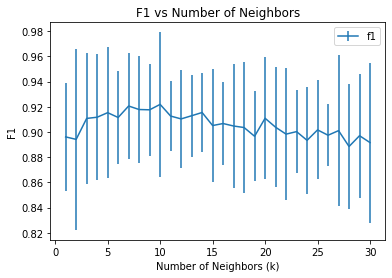

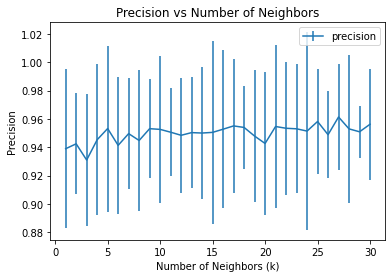

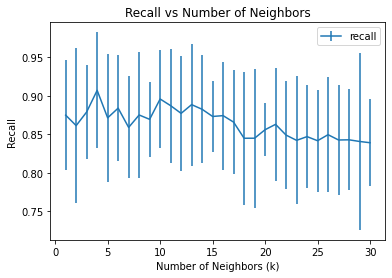

In [39]:
#Plotting the KNN classifier's outcomes for various k and metric values
#For displaying the score fluctuation, error bars are placed on the plot
import matplotlib.pyplot as plt
plt.errorbar(k_values, k_score_mean['f1'][:30], yerr = k_score_std['f1'][:30], label="f1")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1')
plt.legend()
plt.title('F1 vs Number of Neighbors')
plt.show()

import matplotlib.pyplot as plt
plt.errorbar(k_values, k_score_mean['precision'][:30], yerr = k_score_std['precision'][:30], label="precision")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision vs Number of Neighbors')
plt.show()

import matplotlib.pyplot as plt
plt.errorbar(k_values, k_score_mean['recall'][:30], yerr = k_score_std['recall'][:30], label="recall")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall vs Number of Neighbors')
plt.show()

Manhattan Distance based F1, Precision, Recall shown above

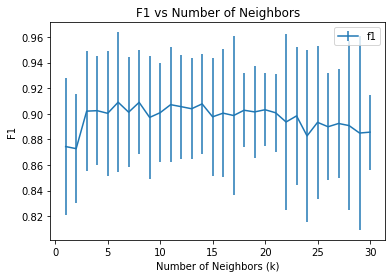

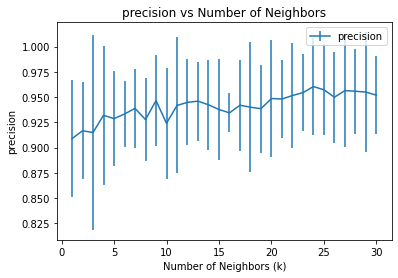

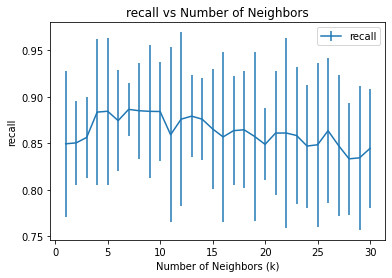

In [40]:
#Plotting the KNN classifier's outcomes for various k and metric values
#For displaying the score fluctuation, error bars are placed on the plot
import matplotlib.pyplot as plt
plt.errorbar(k_values, k_score_mean['f1'][30:], yerr = k_score_std['f1'][30:], label="f1")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1')
plt.legend()
plt.title('F1 vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, k_score_mean['precision'][30:], yerr = k_score_std['precision'][30:], label="precision")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('precision')
plt.legend()
plt.title('precision vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, k_score_mean['recall'][30:], yerr = k_score_std['recall'][30:], label="recall")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('recall')
plt.legend()
plt.title('recall vs Number of Neighbors')
plt.show()

Euclidean Distance based F1, Precision, Recall shown above

In [41]:
#SVD Low and High value approximation code
#Using SVD for transforming the data
#Matrix is factorized into three matrices, U, S, and VT
#Utilizing StandardScaler to scale the training set data
#Using the standardized training data, SVD is performed using U, s, and VT
#applies the same StandardScaler to the full data set and conducts SVD on the scaled data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import svd

X_train_scaled = StandardScaler().fit_transform(x_train)
U, s, VT = svd(X_train_scaled.transpose().dot(X_train_scaled))

X_scaled = StandardScaler().fit_transform(x)
U, s, VT = svd(X_scaled.transpose().dot(X_scaled))

(0.0, 3500.0)

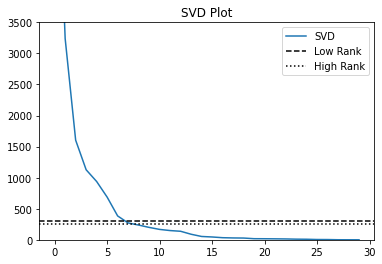

In [74]:
#singular values produced from the SVD are being plotted
#x-axis: index of the singular values
#y-axis: singular values
plt.plot(s, label='SVD')
plt.axhline(300, color='k', linestyle='--', label='Low Rank')
plt.axhline(250, color='k', linestyle=':', label='High Rank')
plt.legend()
plt.title('SVD Plot')
plt.ylim([0, 3500])

SVD Plot: Singular values produced from the SVD are being plotted above.

x-axis: index of the singular values.

y-axis: singular values

In [43]:
from sklearn.model_selection import cross_val_score
#Two empty lists, k_accuracies_low and k_accuracies_high are initialized
#Setting k_values : list of integers and kfold: KFold object with 5 splits
kfold = KFold(n_splits=5)
k_values = list(range(1, 31))
k_accuracies_low = []
k_accuracies_high = []

# two TruncatedSVD objects are created for low_rank_approximation and high_rank_approximation
#Used to modify the training and testing data using the above created SVD objects and stores the modified data
low_rank_approximation = TruncatedSVD(n_components=2)
low_rank_train_data = low_rank_approximation.fit_transform(x_train)
low_rank_test_data = low_rank_approximation.transform(x_test)

high_rank_approximation = TruncatedSVD(n_components=15)
high_rank_train_data = high_rank_approximation.fit_transform(x_train)
high_rank_test_data = high_rank_approximation.transform(x_test)

In [44]:
#Doing initialization of the empty lists
f1l_sample = []
f1h_sample = []

precisionl_sample = []
precisionh_sample = []

recalll_sample = []
recallh_sample = []

In [45]:
#In order to assess how good the classifier performed on the training set, cross-validation is used
#Fitting a KNN classifier with neighbors for each value of k in k_values 
#Training it on the low-rank and high-rank approximations of the training data
#Collects data of each performance metric's mean and standard deviation for each rank approximation and value of k in the scores_low and scores_high

# Implement SVD with low rank approximation

scores_low = []
scores_high = []

for k in k_values:
    knn_low_rank = KNN_scratch(n_neighbors=k)
#for f1_score    
    f1_results_low = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_low_rank.fit(x[train_index], y[train_index])
      ypred = knn_low_rank.predict(x[test_index])
      f1_results_low.append(f1_score(y[test_index], ypred))

    f1_results_low = np.array(f1_results_low)     
    
    scores_low.append({'f1 mean':f1_results_low.mean(),'f1 std':f1_results_low.std()})

#for precision_score
    pre_results_low = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_low_rank.fit(x[train_index], y[train_index])
      ypred = knn_low_rank.predict(x[test_index])
      pre_results_low.append(precision_score(y[test_index], ypred))

    pre_results_low = np.array(pre_results_low) 

    scores_low[-1].update({'precision mean':pre_results_low.mean(),'precision std':pre_results_low.std()})

#for recall_score
    rec_results_low = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_low_rank.fit(x[train_index], y[train_index])
      ypred = knn_low_rank.predict(x[test_index])
      rec_results_low.append(recall_score(y[test_index], ypred))

    rec_results_low = np.array(rec_results_low) 
    
    scores_low[-1].update({'recall mean':rec_results_low.mean(),'recall std':rec_results_low.std()})
    
    #holding the mean F1 score, precision, and recall for each value of k for low rank approximation
    f1l_sample.append(f1_results_low.mean())
    precisionl_sample.append(pre_results_low.mean())
    recalll_sample.append(rec_results_low.mean())

  # Implement SVD with high rank approximation
    
    knn_high_rank = KNN_scratch(n_neighbors=k)
#for f1_score
    f1_results_high = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_high_rank.fit(x[train_index], y[train_index])
      ypred = knn_high_rank.predict(x[test_index])
      f1_results_high.append(f1_score(y[test_index], ypred))

    f1_results_high = np.array(f1_results_high)
    
    scores_high.append({'f1 mean':f1_results_high.mean(),'f1 std':f1_results_high.std()})

#for precision_score
    pre_results_high = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_high_rank.fit(x[train_index], y[train_index])
      ypred = knn_high_rank.predict(x[test_index])
      pre_results_high.append(precision_score(y[test_index], ypred))

    pre_results_high = np.array(pre_results_high)
    
    scores_high[-1].update({'precision mean':pre_results_high.mean(),'precision std':pre_results_high.std()})

#for recall_score    
    rec_results_high = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_high_rank.fit(x[train_index], y[train_index])
      ypred = knn_high_rank.predict(x[test_index])
      rec_results_high.append(recall_score(y[test_index], ypred))

    rec_results_high = np.array(rec_results_high)
    
    scores_high[-1].update({'recall mean':rec_results_high.mean(),'recall std':rec_results_high.std()})
    
    #holding the mean F1 score, precision, and recall for each value of k for high rank approximation
    f1h_sample.append(f1_results_high.mean())
    precisionh_sample.append(pre_results_high.mean())
    recallh_sample.append(rec_results_high.mean())

In [46]:
#Add the greatest feasible f1, precision, and recall scores to the lists of low rank and high rank approximations.
f1.append(max(f1l_sample))
f1.append(max(f1h_sample))

precision.append(max(precisionl_sample))
precision.append(max(precisionh_sample))

recall.append(max(recalll_sample))
recall.append(max(recallh_sample))

In [47]:
#print f1, precision, recall after the above operations
print(f1)
print(precision)
print(recall)

[0.9218980545704684, 0.9090611311245738, 0.9147009269209099, 0.9142097882274489]
[0.9613404228621618, 0.9603491436100132, 0.9599008898911888, 0.9593178007698467]
[0.9070448586501219, 0.8864892392571757, 0.8881496792681004, 0.8871630446585075]


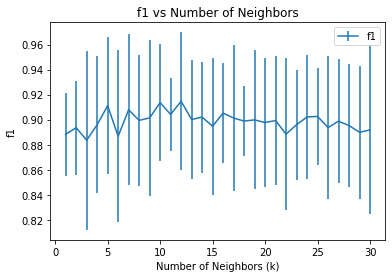

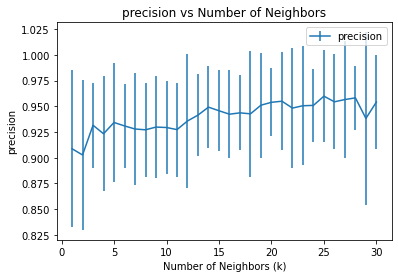

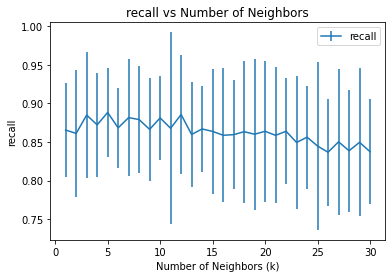

In [48]:
#Generating error bar plots for Performance metrics vs Number of Neighbors(k)
#x-axis: k number of neighbors
#y-axis: corresponding performance measure score
#error bars in the cross-validation procedure show the standard deviation of the performance metric values across the various folds

#for Low approximation
plt.errorbar(k_values, [scores_low[i]['f1 mean'] for i in range(len(scores_low))], yerr = [scores_low[i]['f1 std'] for i in range(len(scores_low))], label="f1")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('f1')
plt.legend()
plt.title('f1 vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_low[i]['precision mean'] for i in range(len(scores_low))], yerr = [scores_low[i]['precision std'] for i in range(len(scores_low))], label="precision")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('precision')
plt.legend()
plt.title('precision vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_low[i]['recall mean'] for i in range(len(scores_low))], yerr = [scores_low[i]['recall std'] for i in range(len(scores_low))], label="recall")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('recall')
plt.legend()
plt.title('recall vs Number of Neighbors')
plt.show()

SVD Low approximation based F1, Precision, Recall shown above

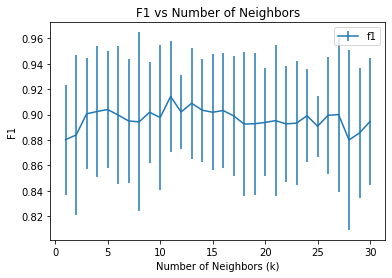

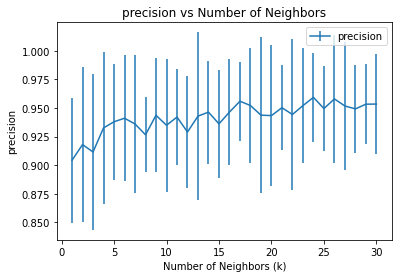

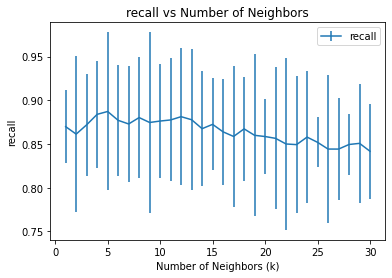

In [49]:
#Generating error bar plots for Performance metrics vs Number of Neighbors(k)
#x-axis: k number of neighbors
#y-axis: corresponding performance measure score
#error bars in the cross-validation procedure show the standard deviation of the performance metric values across the various folds

#For high approximation
plt.errorbar(k_values, [scores_high[i]['f1 mean'] for i in range(len(scores_high))], yerr = [scores_high[i]['f1 std'] for i in range(len(scores_high))], label="f1")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1')
plt.legend()
plt.title('F1 vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_high[i]['precision mean'] for i in range(len(scores_high))], yerr = [scores_high[i]['precision std'] for i in range(len(scores_high))], label="precision")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('precision')
plt.legend()
plt.title('precision vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_high[i]['recall mean'] for i in range(len(scores_high))], yerr = [scores_high[i]['recall std'] for i in range(len(scores_high))], label="recall")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('recall')
plt.legend()
plt.title('recall vs Number of Neighbors')
plt.show()

SVD High approximation based F1, Precision, Recall shown above

In [50]:
#AUTO ENCODER
#import statements
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.models import Sequential

In [51]:
#reading data.csv file and removing columns having missing values
#scaling all remaining columns(except id and diagnosis) using the MinMaxScaler

#removes all columns along the columns axis (axis=1) that have missing values
df = pd.read_csv('data.csv').dropna(axis=1)

#Obtains every column name in dataframe except from id and diagnosis
feats = df.columns.difference(['id', 'diagnosis'])
#Fits and transforms df by creating a ColumnTransformer object and applying the MinMaxScaler to all of the columns in feats 
df.loc[:, feats] = ColumnTransformer([('mmx', MinMaxScaler(), list(feats))]).fit_transform(df)

In [52]:
#splitting the preprocessed dataset into training and validation sets
#Maintenance of the class distribution is done in both the training and validation sets due to the stratify parameter
#Utilizing the cat.codes method, the target column is encoded as categorical codes
train_df, val_df = train_test_split(df, stratify=df.diagnosis, test_size=0.2, random_state=42)
train_X, val_X = train_df[feats].values, val_df[feats].values
train_y, val_y = train_df['diagnosis'].astype('category').cat.codes,val_df['diagnosis'].astype('category').cat.codes

In [53]:
#Autoencoder class derives from the tf.keras.Model class 
#In its __init__() method, it specifies the architecture of the autoencoder model

# tf.keras.Sequential class enables simple sequential stacking of layers and is utilized to define the encoder and decoder layers
# latent_layer: Dense layer and it produces a latent representation of the incoming data
#call(): forward pass of the model is specified here
#The encoded representation of the input data is created by passing the input x through the encoder layers and the output of the encoder layers via the latent layer

from keras.layers.serialization import activation
class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim, inp_shp):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.inp_shp = inp_shp
        self.encoder = tf.keras.Sequential([
                                            tf.keras.layers.Dense(self.inp_shp, activation='relu'),
                                            tf.keras.layers.Dense(5, activation='relu')
                                           ])
        self.latent_layer = tf.keras.layers.Dense(self.latent_dim, activation='relu')
        self.decoder = tf.keras.Sequential([
                                            tf.keras.layers.Dense(5, activation='relu'),
                                            tf.keras.layers.Dense(self.inp_shp, activation='sigmoid')
                                           ])
    def call(self, x):
        x = self.encoder(x)
        encoded = self.latent_layer(x)
        decoded = self.decoder(encoded)
        return decoded

In [54]:
#Obtains every column name in dataframe except from id and diagnosis
feats = df.columns.difference(['id', 'diagnosis'])

In [55]:
#constructs an instance of the Autoencoder class with a latent dimension equal to 5% of the number of input features.
#Then, compiles the model using the Adam optimizer and mean squared error loss function 
autoencoder_bottm5 = Autoencoder(len(feats)*5//100, len(feats))
autoencoder_bottm5.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [56]:
#constructs an instance of the Autoencoder class with a latent dimension equal to 20% of the number of input features.
#Then, compiles the model using the Adam optimizer and mean squared error loss function 
autoencoder_bottm20 = Autoencoder(len(feats)*20//100, len(feats))
autoencoder_bottm20.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [57]:
# setting patience=10 in this instance
#Due to this, Keras utilizes the early stop callback during training and terminates training after 10 epochs if the validation loss has not improved
early_stop = tf.keras.callbacks.EarlyStopping(patience=10)

In [58]:
#The mean squared error loss function and Adam optimizer are used to train the autoencoder bottm5 model on the training set train_X
#Maximum 100 epochs of training are performed on the model, or until early stopping requirements are satisfied
#With the EarlyStopping callback, the validation set val_X is utilized to track the loss during training and avoid overfitting
#Following training, predictions on train_X are used to produce the reconstructed inputs for the training set, which are then stored in bot5_x

autoencoder_bottm5.fit(train_X, train_X, epochs=100, shuffle=True,
                validation_data=(val_X, val_X), callbacks=[early_stop], verbose=0)

bot5_x = autoencoder_bottm5.predict(train_X)

15/15 [==============================] - 0s 2ms/step


In [59]:
#The mean squared error loss function and Adam optimizer are used to train the autoencoder bottm20 model on the training set train_X
#Maximum 100 epochs of training are performed on the model, or until early stopping requirements are satisfied
#With the EarlyStopping callback, the validation set val_X is utilized to track the loss during training and avoid overfitting
#Following training, predictions on train_X are used to produce the reconstructed inputs for the training set, which are then stored in bot20_x

autoencoder_bottm20.fit(train_X, train_X, epochs=100, shuffle=True,
                validation_data=(val_X, val_X), callbacks=[early_stop], verbose=0)

bot20_x = autoencoder_bottm20.predict(train_X)

15/15 [==============================] - 0s 2ms/step


In [ ]:
#evaluation of the performance on the original data and data compressed using autoencoders with 5% and 20% bottleneck
#this is done for each value of k
#used to determine the mean, standard deviation for the data for each value of k. 
#The scores_bot5 and scores_bot20 lists store the results

scores_bot5 = []
scores_bot20 = []

f15_sample = []
f120_sample = []

precision5_sample = []
precision20_sample = []


recall5_sample = []
recall20_sample = []


for k in k_values:
    knn_bot5 = KNN_scratch(n_neighbors=k)
    # Implement auto encoder with 5% bottleneck

#for f1_score    
    f1_results_bot5 = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_bot5.fit(x[train_index], y[train_index])
      ypred = knn_bot5.predict(x[test_index])
      f1_results_bot5.append(f1_score(y[test_index], ypred))

    f1_results_bot5 = np.array(f1_results_bot5)
    
    scores_bot5.append({'f1 mean':f1_results_bot5.mean(),'f1 std':f1_results_bot5.std()})

#for precision_score    
    pre_results_bot5 = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_bot5.fit(x[train_index], y[train_index])
      ypred = knn_bot5.predict(x[test_index])
      pre_results_bot5.append(precision_score(y[test_index], ypred))

    pre_results_bot5 = np.array(pre_results_bot5)
    
    scores_bot5[-1].update({'precision mean':pre_results_bot5.mean(),'precision std':pre_results_bot5.std()})

#for recall_score    
    rec_results_bot5 = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_bot5.fit(x[train_index], y[train_index])
      ypred = knn_bot5.predict(x[test_index])
      rec_results_bot5.append(recall_score(y[test_index], ypred))

    rec_results_bot5 = np.array(rec_results_bot5)
    
    scores_bot5[-1].update({'recall mean':rec_results_bot5.mean(),'recall std':rec_results_bot5.std()})

    f15_sample.append(f1_results_bot5.mean())
    precision5_sample.append(pre_results_bot5.mean())
    recall5_sample.append(rec_results_bot5.mean())
    #Implement auto encoder with 20% bottleneck
    
    knn_bot20 = KNN_scratch(n_neighbors=k)
#for f1_score
    f1_results_bot20 = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_bot20.fit(x[train_index], y[train_index])
      ypred = knn_bot20.predict(x[test_index])
      f1_results_bot20.append(f1_score(y[test_index], ypred))

    f1_results_bot20 = np.array(f1_results_bot20)
    
    scores_bot20.append({'f1 mean':f1_results_bot20.mean(),'f1 std':f1_results_bot20.std()})

#for precision_score    
    pre_results_bot20 = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_bot20.fit(x[train_index], y[train_index])
      ypred = knn_bot20.predict(x[test_index])
      pre_results_bot20.append(precision_score(y[test_index], ypred))

    pre_results_bot20 = np.array(pre_results_bot20)
    
    scores_bot20[-1].update({'precision mean':pre_results_bot20.mean(),'precision std':pre_results_bot20.std()})
    
#for recall_score    
    rec_results_bot20 = []
    for i, (train_index, test_index) in enumerate(kfold_manh.split(x)):
      knn_bot20.fit(x[train_index], y[train_index])
      ypred = knn_bot20.predict(x[test_index])
      rec_results_bot20.append(recall_score(y[test_index], ypred))

    rec_results_bot20 = np.array(rec_results_bot20)

    scores_bot20[-1].update({'recall mean':rec_results_bot20.mean(),'recall std':rec_results_bot20.std()})

#the code stores the F1 score, precision, and recall in distinct lists  for each value of k and for each type of data compression

    f120_sample.append(f1_results_bot20.mean())
    precision20_sample.append(pre_results_bot20.mean())
    recall20_sample.append(rec_results_bot20.mean())

In [61]:
#calculate the maximum F1 score, precision, and recall for the 5% and 20% bottleneck model, respectively, and add them to the appropriate lists of f1, precision, and recall
f1.append(max(f15_sample))
f1.append(max(f120_sample))
print(f1)

precision.append(max(precision5_sample))
precision.append(max(precision20_sample))
print(precision)

recall.append(max(recall5_sample))
recall.append(max(recall20_sample))
print(recall)

[0.9218980545704684, 0.9090611311245738, 0.9147009269209099, 0.9142097882274489, 0.9135869096198075, 0.915053279956757]
[0.9613404228621618, 0.9603491436100132, 0.9599008898911888, 0.9593178007698467, 0.9589150319127437, 0.9602475391376993]
[0.9070448586501219, 0.8864892392571757, 0.8881496792681004, 0.8871630446585075, 0.886536986031871, 0.8993752689805321]


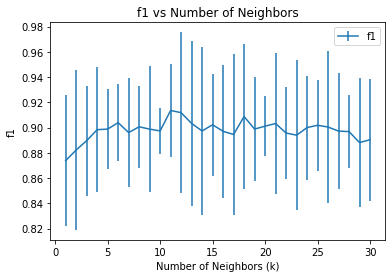

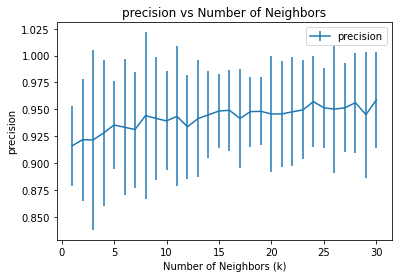

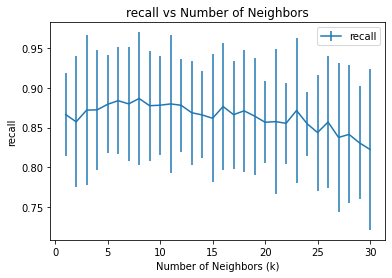

In [62]:
#plots display the performance when the bottleneck 5% features are used. 
#y-axis:performance metric(f1, precision, or recall)
#x-axis:number of neighbors used in the categorization
#For each value of k, the error bars depict the performance metric(f1, precision, or recall)'s standard deviation

#for bottleneck 5%
plt.errorbar(k_values, [scores_bot5[i]['f1 mean'] for i in range(len(scores_bot5))], yerr = [scores_bot5[i]['f1 std'] for i in range(len(scores_bot5))], label="f1")

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('f1')
plt.legend()
plt.title('f1 vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_bot5[i]['precision mean'] for i in range(len(scores_bot5))], yerr = [scores_bot5[i]['precision std'] for i in range(len(scores_bot5))], label="precision")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('precision')
plt.legend()
plt.title('precision vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_bot5[i]['recall mean'] for i in range(len(scores_bot5))], yerr = [scores_bot5[i]['recall std'] for i in range(len(scores_bot5))], label="recall")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('recall')
plt.legend()
plt.title('recall vs Number of Neighbors')
plt.show()

Auto Encoder Bottleneck 5% based F1, Precision, Recall shown above

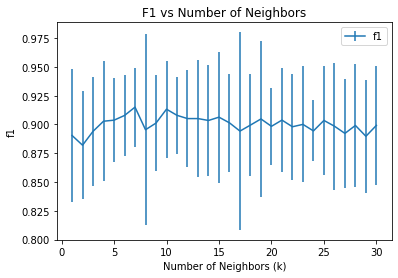

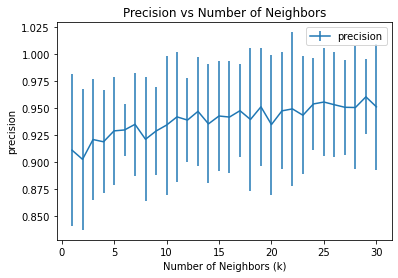

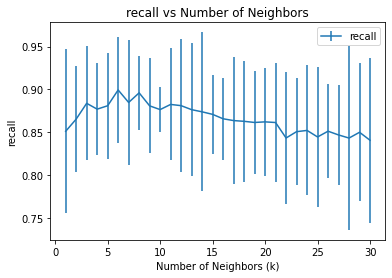

In [63]:
#plots display the performance when the bottleneck 20% features are used. 
#y-axis:performance metric(f1, precision, or recall)
#x-axis:number of neighbors used in the categorization
#For each value of k, the error bars depict the performance metric(f1, precision, or recall)'s standard deviation

#for bottleneck 20%
plt.errorbar(k_values, [scores_bot20[i]['f1 mean'] for i in range(len(scores_bot20))], yerr = [scores_bot20[i]['f1 std'] for i in range(len(scores_bot20))], label="f1")

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('f1')
plt.legend()
plt.title('F1 vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_bot20[i]['precision mean'] for i in range(len(scores_bot20))], yerr = [scores_bot20[i]['precision std'] for i in range(len(scores_bot20))], label="precision")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('precision')
plt.legend()
plt.title('Precision vs Number of Neighbors')
plt.show()

plt.errorbar(k_values, [scores_bot20[i]['recall mean'] for i in range(len(scores_bot20))], yerr = [scores_bot20[i]['recall std'] for i in range(len(scores_bot20))], label="recall")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('recall')
plt.legend()
plt.title('recall vs Number of Neighbors')
plt.show()

Auto Encoder Bottleneck 20% based F1, Precision, Recall shown above

### Implementation correctness implementation

In [64]:
#generating a pandas DataFrame "data" that contains the data from "implementation correctness dataset.csv"

data = pd.read_csv("implementation_correctness_dataset.csv")

In [65]:
#constructs a Python list test_data
#using the values as given in the requirement
test_data = [1.4, 3]

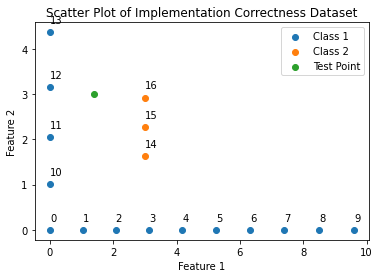

In [66]:
#The implementation correctness dataset is plotted using this code in a scatter plot with two classes (class 1 and class 2) and one test point
#Using boolean indexing, it first extracts the points that correspond to classes 1 and 2. Thereafter, it puts them in c1 and c2
c1 = data[data['Class/Cluster'] == 1] # extract cluster 1 points
c2 = data[data['Class/Cluster'] == 2] # extract cluster 2 points
plt.figure(figsize=(6,4)) 
#generates a scatter plot of features from c1 and c2
#x-axis: Feature 1
#y-axis: Feature 2
plt.scatter(c1.iloc[:,0].values, c1.iloc[:,1].values, label="Class 1")  # Plot class 1 points
plt.scatter(c2.iloc[:,0].values, c2.iloc[:,1].values, label='Class 2')  # Plot class 2 points
plt.scatter(test_data[0], test_data[1], label="Test Point")

#Each point receives an annotation giving its index inside the dataset 
for i in range(len(data)):
    plt.annotate(f"{i}", (data.iloc[i,0], data.iloc[i,1]+0.2))

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Implementation Correctness Dataset")
plt.legend()
plt.show()

3 closest neighbor to the test point

In [67]:
#For Euclidean distance

#The training data and their accompanying labels are passed to the fit() method
#this trains the KNN_scratch model
knn_euc = KNN_scratch()
knn_euc.fit(data.iloc[:,:2],data.iloc[:,-1])
#The test data containing the two values is then passed to the get_nn() method
#Utilizing the distance measure from the training, this approach locates the data point's closest neighbors. 
#The nns variable is used to hold the resulting nearest neighbors
nns = knn_euc.get_nn(test_data)

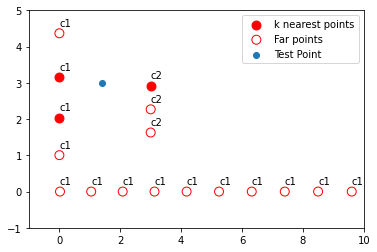

In [68]:
#near_points: stores the k-nearest points to the test point
#far_points: stores the remaining points
near_points = data.iloc[nns.index]
far_points = data.drop(nns.index, axis=0)

#creates a scatter plot
plt.figure(figsize=(6,4)) 
plt.scatter(near_points.iloc[:,0].values, near_points.iloc[:,1].values, label="k nearest points", s=80, facecolors='r', edgecolors='r')  # Plot class 1 points
plt.scatter(far_points.iloc[:,0].values, far_points.iloc[:,1].values, label='Far points', s=80, facecolors='none', edgecolors='r')  # Plot class 2 points
plt.scatter(test_data[0], test_data[1], label="Test Point")
plt.legend()

for i in range(len(data)):
    plt.annotate(f"c{data.iloc[i,2]}", (data.iloc[i,0], data.iloc[i,1]+0.2))

#x-axis limits:(-1, 10)
#y-axis limits:(-1, 5)
plt.xlim((-1, 10))
plt.ylim((-1, 5))
plt.show()

We can see from the above scatter plot, 2 `class1` points are near the test point and 1 `class2` points is near the test point. Based on this, we can say, the test point belongs to `class1`

In [69]:
#predict method accepts a single argument "test_data". This argument is a list of feature values for the test data points
#this outputs the predicted class labels for the specified test data point 
knn_euc.predict([test_data])

array([1])

In [70]:
#For Manhattan distance

#The training data and their accompanying labels are passed to the fit() method
#this trains the KNN_scratch model
knn_man = KNN_scratch(metric='manhattan')
knn_man.fit(data.iloc[:,:2],data.iloc[:,-1])
#The test data containing the two values is then passed to the get_nn() method
#Utilizing the distance measure from the training, this approach locates the data point's closest neighbors. 
#The nns variable is used to hold the resulting nearest neighbors
nns = knn_man.get_nn(test_data)

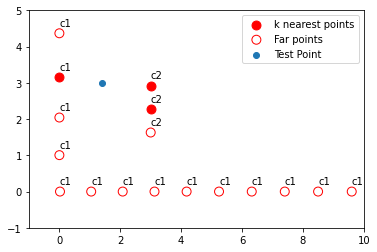

In [71]:
#near_points: stores the k-nearest points to the test point
#far_points: stores the remaining points

near_points = data.iloc[nns.index]
far_points = data.drop(nns.index, axis=0)

#creates a scatter plot
plt.figure(figsize=(6,4)) 
plt.scatter(near_points.iloc[:,0].values, near_points.iloc[:,1].values, label="k nearest points", s=80, facecolors='r', edgecolors='r')  # Plot class 1 points
plt.scatter(far_points.iloc[:,0].values, far_points.iloc[:,1].values, label='Far points', s=80, facecolors='none', edgecolors='r')  # Plot class 2 points
plt.scatter(test_data[0], test_data[1], label="Test Point")
plt.legend()

for i in range(len(data)):
    plt.annotate(f"c{data.iloc[i,2]}", (data.iloc[i,0], data.iloc[i,1]+0.2))

#x-axis limits:(-1, 10)
#y-axis limits:(-1, 5)
plt.xlim((-1, 10))
plt.ylim((-1, 5))
plt.show()

We can see from the above scatter plot, 2 `class2` points are near the test point and 1 `class1` points is near the test point. Based on this, we can say, the test point belongs to `class2`

In [ ]:
#predict method accepts a single argument "test_data". This argument is a list of feature values for the test data points
#this outputs the predicted class labels for the specified test data point
knn_man.predict([test_data])